In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

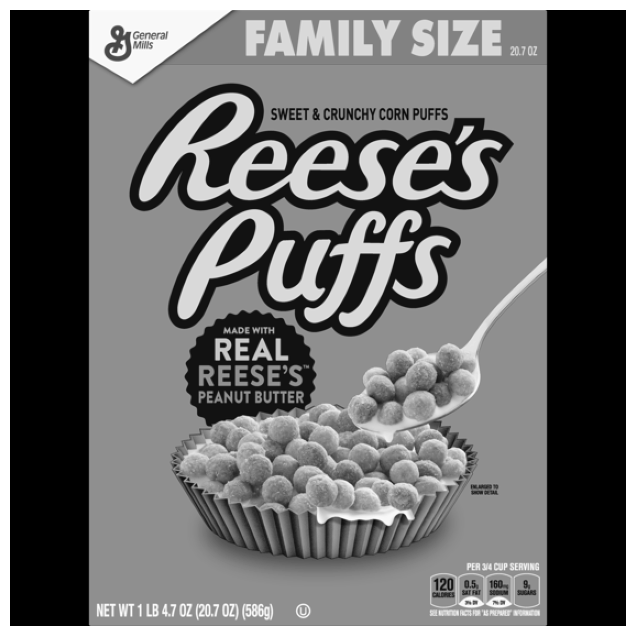

In [3]:
reeses_puff_img_gray = cv2.imread('Data/reeses_puffs.png', 0)

display_img(reeses_puff_img_gray)

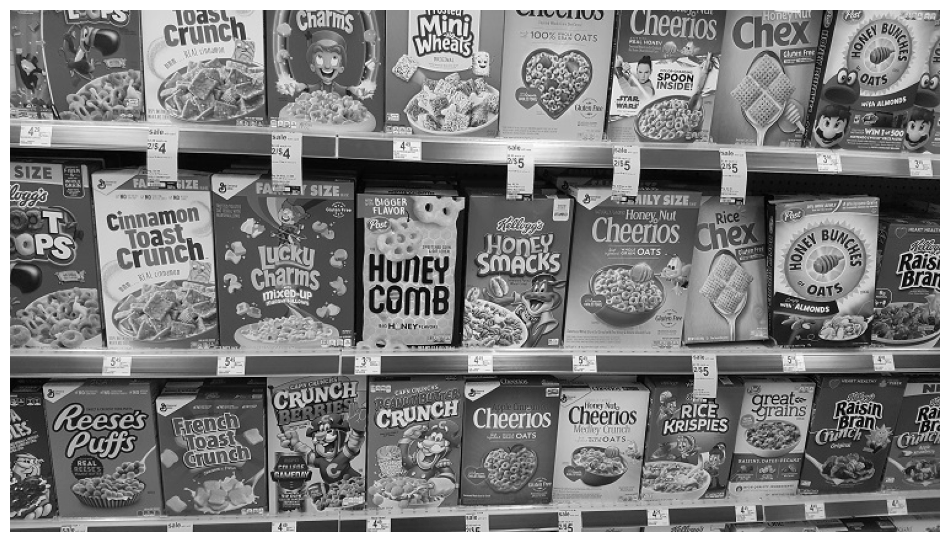

In [4]:
cereals_img_gray = cv2.imread('Data/many_cereals.jpg', 0)

display_img(cereals_img_gray)

## FEATURE MATCHING:

### BRUTE FORCE MATCHING WITH SIFT DESCRIPTORS & RADIO TEST:

In [5]:
#extracts defining key featurees from an input image.
#using corner, edge, contour detection

#but template matching - exact same object in image
#SIFT is for images of diff scales(sizes)

#creating a SIFT object
sift = cv2.xfeatures2d.SIFT_create()


[ WARN:0@25.913] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [6]:
sift

< cv2.SIFT 0x11ce260f0>

In [7]:
#keypoints and descriptors for this detector object
kp_rp, desc_rp = sift.detectAndCompute(reeses_puff_img_gray, None)
kp_cr, desc_cr = sift.detectAndCompute(cereals_img_gray, None)

In [8]:
kp_rp

(< cv2.KeyPoint 0x11cbd2160>,
 < cv2.KeyPoint 0x11ceb3570>,
 < cv2.KeyPoint 0x11ceb03c0>,
 < cv2.KeyPoint 0x11ceb2a30>,
 < cv2.KeyPoint 0x11ceb2af0>,
 < cv2.KeyPoint 0x11ceb35d0>,
 < cv2.KeyPoint 0x11ceb30f0>,
 < cv2.KeyPoint 0x11ce39b30>,
 < cv2.KeyPoint 0x11ce39a70>,
 < cv2.KeyPoint 0x11ce39f20>,
 < cv2.KeyPoint 0x11ce393b0>,
 < cv2.KeyPoint 0x11ce39f50>,
 < cv2.KeyPoint 0x11ce799b0>,
 < cv2.KeyPoint 0x11ce79830>,
 < cv2.KeyPoint 0x11ce79a10>,
 < cv2.KeyPoint 0x11ce79a70>,
 < cv2.KeyPoint 0x11ce79770>,
 < cv2.KeyPoint 0x11ce79b30>,
 < cv2.KeyPoint 0x11cd7b600>,
 < cv2.KeyPoint 0x11ced8570>,
 < cv2.KeyPoint 0x11ced8420>,
 < cv2.KeyPoint 0x11ced85a0>,
 < cv2.KeyPoint 0x11ced83f0>,
 < cv2.KeyPoint 0x11ced83c0>,
 < cv2.KeyPoint 0x11ced85d0>,
 < cv2.KeyPoint 0x11ced8600>,
 < cv2.KeyPoint 0x11ced8630>,
 < cv2.KeyPoint 0x11ced8660>,
 < cv2.KeyPoint 0x11ced8690>,
 < cv2.KeyPoint 0x11ced86c0>,
 < cv2.KeyPoint 0x11ced86f0>,
 < cv2.KeyPoint 0x11ced8720>,
 < cv2.KeyPoint 0x11ced8750>,
 < cv2.Key

In [9]:
kp_cr

(< cv2.KeyPoint 0x11ceedbc0>,
 < cv2.KeyPoint 0x11ceedbf0>,
 < cv2.KeyPoint 0x11ceedc20>,
 < cv2.KeyPoint 0x11ceedc50>,
 < cv2.KeyPoint 0x11ceedc80>,
 < cv2.KeyPoint 0x11ceedcb0>,
 < cv2.KeyPoint 0x11ceedce0>,
 < cv2.KeyPoint 0x11ceedd10>,
 < cv2.KeyPoint 0x11ceedd40>,
 < cv2.KeyPoint 0x11ceedd70>,
 < cv2.KeyPoint 0x11ceedda0>,
 < cv2.KeyPoint 0x11ceeddd0>,
 < cv2.KeyPoint 0x11ceede00>,
 < cv2.KeyPoint 0x11ceede30>,
 < cv2.KeyPoint 0x11ceede60>,
 < cv2.KeyPoint 0x11ceede90>,
 < cv2.KeyPoint 0x11ceedec0>,
 < cv2.KeyPoint 0x11ceedef0>,
 < cv2.KeyPoint 0x11ceedf20>,
 < cv2.KeyPoint 0x11ceedf50>,
 < cv2.KeyPoint 0x11ceedf80>,
 < cv2.KeyPoint 0x11ceedfb0>,
 < cv2.KeyPoint 0x11ceedfe0>,
 < cv2.KeyPoint 0x11ceee010>,
 < cv2.KeyPoint 0x11ceee040>,
 < cv2.KeyPoint 0x11ceee070>,
 < cv2.KeyPoint 0x11ceee0a0>,
 < cv2.KeyPoint 0x11ceee0d0>,
 < cv2.KeyPoint 0x11ceee100>,
 < cv2.KeyPoint 0x11ceee130>,
 < cv2.KeyPoint 0x11ceee160>,
 < cv2.KeyPoint 0x11ceee190>,
 < cv2.KeyPoint 0x11ceee1c0>,
 < cv2.Key

In [10]:
desc_rp

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [11]:
desc_cr

array([[ 0.,  0.,  0., ...,  5.,  1.,  6.],
       [72., 41.,  0., ...,  6.,  0., 13.],
       [ 3.,  1.,  1., ...,  0.,  1., 17.],
       ...,
       [20.,  7., 35., ...,  0.,  0.,  0.],
       [ 4., 54., 81., ...,  0.,  0.,  0.],
       [32.,  2.,  5., ..., 35., 56., 25.]], dtype=float32)

In [12]:
desc_rp.shape

(1501, 128)

In [13]:
desc_cr.shape

(3744, 128)

In [14]:
type(kp_cr)

tuple

In [15]:
#now using brute force with sift descriptors

#now creating a matching object using bf 

bf = cv2.BFMatcher()


In [16]:
bf

< cv2.BFMatcher 0x11ce27a70>

In [17]:
#now using bf with knn (to find k of nearest neighbors to get top matches)

matches = bf.knnMatch(desc_rp, desc_cr, k=2)

In [18]:
matches

((< cv2.DMatch 0x11cd9f6d0>, < cv2.DMatch 0x11ce27b50>),
 (< cv2.DMatch 0x11ce27910>, < cv2.DMatch 0x11ce27cd0>),
 (< cv2.DMatch 0x11ce27830>, < cv2.DMatch 0x11ce27a10>),
 (< cv2.DMatch 0x11ce27970>, < cv2.DMatch 0x11ce27bf0>),
 (< cv2.DMatch 0x11ce27c70>, < cv2.DMatch 0x11ce27a90>),
 (< cv2.DMatch 0x11ce27a30>, < cv2.DMatch 0x11ce27890>),
 (< cv2.DMatch 0x11ce27c30>, < cv2.DMatch 0x11ce27ab0>),
 (< cv2.DMatch 0x11ce27950>, < cv2.DMatch 0x11ce27c50>),
 (< cv2.DMatch 0x11ce27810>, < cv2.DMatch 0x11ce278b0>),
 (< cv2.DMatch 0x11ce27cf0>, < cv2.DMatch 0x11ce27d30>),
 (< cv2.DMatch 0x11ce27d10>, < cv2.DMatch 0x11ce27d70>),
 (< cv2.DMatch 0x11ce27d50>, < cv2.DMatch 0x11ce27d90>),
 (< cv2.DMatch 0x11ce27db0>, < cv2.DMatch 0x11ce27dd0>),
 (< cv2.DMatch 0x11ce27df0>, < cv2.DMatch 0x11ce27e10>),
 (< cv2.DMatch 0x11ce27b10>, < cv2.DMatch 0x11ce27e50>),
 (< cv2.DMatch 0x11ce27e30>, < cv2.DMatch 0x11ce27e70>),
 (< cv2.DMatch 0x11ce27e90>, < cv2.DMatch 0x11ce27eb0>),
 (< cv2.DMatch 0x11ce27ed0>, < 

In [19]:
len(matches)

1501

In [20]:
#now we have 2 nearest neighbors in each one

#now applying ratio test - finding ones with closest distance
#close - descriptor is good match else bad match(can consider that match else no)

good = []
#list to only have good values

for match1, match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])

        
print(len(good))



79


In [21]:
good

[[< cv2.DMatch 0x11cd9f6d0>],
 [< cv2.DMatch 0x11cf24750>],
 [< cv2.DMatch 0x11cf24d10>],
 [< cv2.DMatch 0x11cf24d50>],
 [< cv2.DMatch 0x11cf24f50>],
 [< cv2.DMatch 0x11cf25550>],
 [< cv2.DMatch 0x11cf25850>],
 [< cv2.DMatch 0x11cf259d0>],
 [< cv2.DMatch 0x11cf25d50>],
 [< cv2.DMatch 0x11cf25f90>],
 [< cv2.DMatch 0x11cf26350>],
 [< cv2.DMatch 0x11cf26450>],
 [< cv2.DMatch 0x11cf276d0>],
 [< cv2.DMatch 0x11cf27710>],
 [< cv2.DMatch 0x11cf27810>],
 [< cv2.DMatch 0x11cf285d0>],
 [< cv2.DMatch 0x11cf28f50>],
 [< cv2.DMatch 0x11cf29010>],
 [< cv2.DMatch 0x11cf290d0>],
 [< cv2.DMatch 0x11cf29950>],
 [< cv2.DMatch 0x11cf29a90>],
 [< cv2.DMatch 0x11cf2ab90>],
 [< cv2.DMatch 0x11cf2acd0>],
 [< cv2.DMatch 0x11cf2ad10>],
 [< cv2.DMatch 0x11cf2aed0>],
 [< cv2.DMatch 0x11cf2af10>],
 [< cv2.DMatch 0x11cf30150>],
 [< cv2.DMatch 0x11cf302d0>],
 [< cv2.DMatch 0x11cf30310>],
 [< cv2.DMatch 0x11cf308d0>],
 [< cv2.DMatch 0x11cf309d0>],
 [< cv2.DMatch 0x11cf30a90>],
 [< cv2.DMatch 0x11cf31050>],
 [< cv2.DM

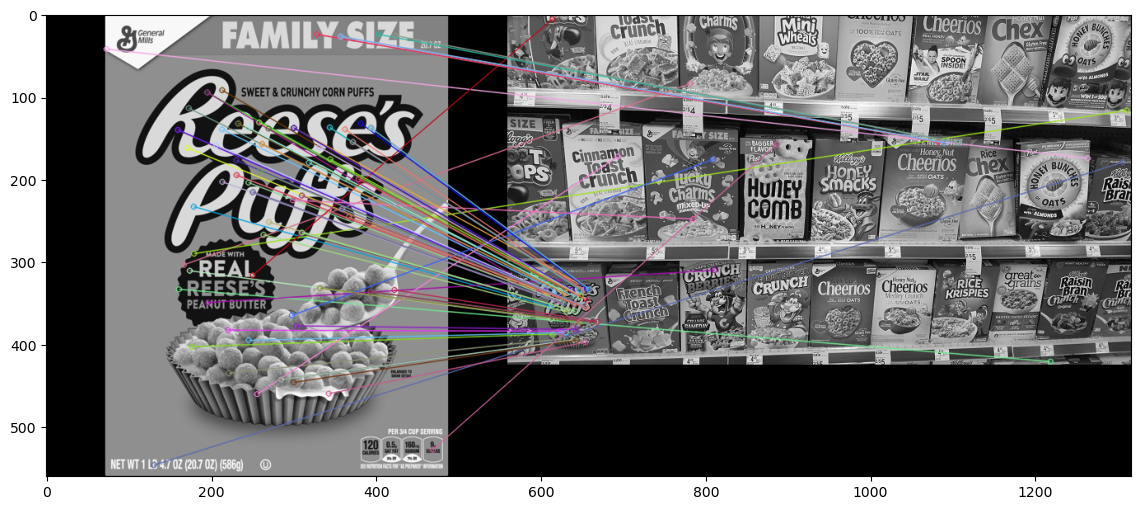

In [22]:
#lot of bad matches removed

#now drawing the best matches

sift_matches = cv2.drawMatchesKnn(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_cr, good, None, flags=2)


fig = plt.figure(figsize=(14,9))
plt.imshow(sift_matches)
plt.show()
plt.close()

In [23]:
#kind of better match